# **Business understanding**


Для чего решаем аналитическую задачу

Определяем бизнесс-цели и критерии успеха

Оценка ситуации: ресурсы, требования, ограничения, риски, анализ затрат

Цели DS и критерии успеха DS

Создание плана проекта

Строим модель для выявления качества вина на основании измеренных значений различных атрибутов, чтобы получать информацию о качестве продукта быстрее.

Более быстрое определение качества позволит улучшить процессы логистики (оформлять заказы быстрее) и наладить ценообразование.

Критерии успеха: увеличение количества продаваемой продукции, исключение ситуации отсутствия товара в наличии. 

Ресурсы: база данных с информацией по показателям вина и его качестве, дата-инженер для извлечения и структурирования данных, аналитик для обработки и подготовки данных, Data Scientist для построения модели, ее оценки, менеджер проекта для управления рисками, отслежавиния плана, корректировок. 


# **Готовность к Data Understanding**

Доступ к данным. Обстоятельства, влияющие на успех.
Как анализ данных поможет достичь целей бизнеса.
Как будут представлены результаты.

Проверяем источники данных и доступ к ним. 
Оцениваем надежность источников, какие данные брать, какие нет.
Результаты будут в виде некоторого ПО, в которое можно ввести показатели параметров вина и получить оценку его качества.

# **Data understanding**

собрать все имеющиеся данные,
описать данные,
исследовать данные,
описать качество

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


В данных есть пропущенные значения

# **Готовность к data preparation**

Все ли источники данных определены и доступны,
определены ли атрибуты.
Базовые статистики каждого атрибута.
Какие проблемы качества данных

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

# **Data preparation**

очистка данных, заполнение пропусков, деление на train test,
подготовка датафрейма для обучения модели

смотрю отсутствующие значения

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

заменяю их на средние значения

In [8]:
df["fixed acidity"].fillna(df["fixed acidity"].mean(), inplace = True)
df["fixed acidity"].isnull().sum()

0

In [9]:
df["volatile acidity"].fillna(df["volatile acidity"].mean(), inplace = True)
df["volatile acidity"].isnull().sum()

0

In [10]:
df["citric acid"].fillna(df["citric acid"].mean(),inplace=True)
df["citric acid"].isnull().sum()

0

In [11]:
df["residual sugar"].fillna(df["residual sugar"].mean(),inplace=True)
df["residual sugar"].isnull().sum()

0

In [12]:
df["chlorides"].fillna(df["chlorides"].mean(),inplace=True)
df["chlorides"].isnull().sum()

0

In [13]:
df["pH"].fillna(df["pH"].mean(),inplace=True)
df["pH"].isnull().sum()

0

In [14]:
df["sulphates"].fillna(df["sulphates"].mean(),inplace=True)
df["sulphates"].isnull().sum()

0

альтернативный вариант:

In [ ]:
for i in df.columns:
    df[i].fillna(value=df[i].mean(), inplace=True)

df.isnull().sum()

In [15]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Здесь можно визуализировать, посмотреть корреляции, выбросы

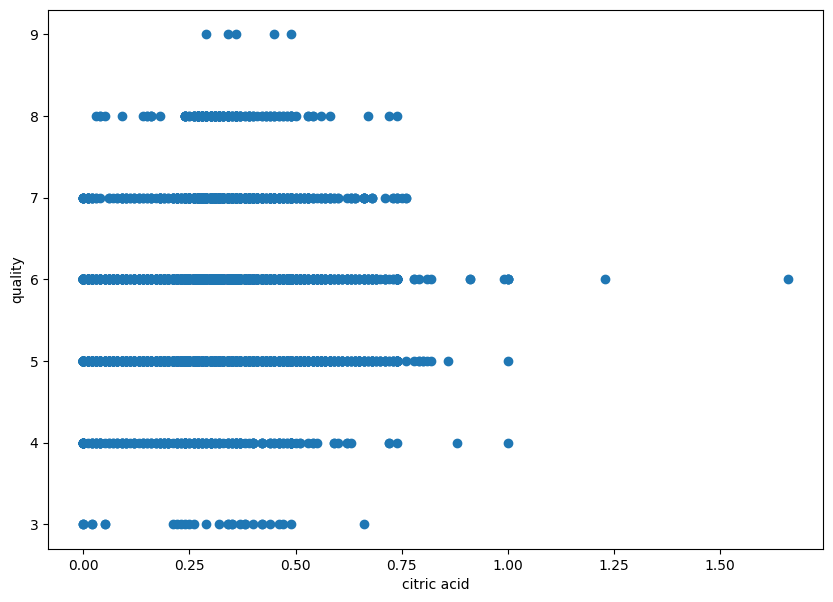

In [19]:
plt.figure(figsize = (10, 7))
plt.scatter(x = "citric acid", y = "quality", data = df)
plt.xlabel("citric acid")
plt.ylabel("quality")
plt.show()

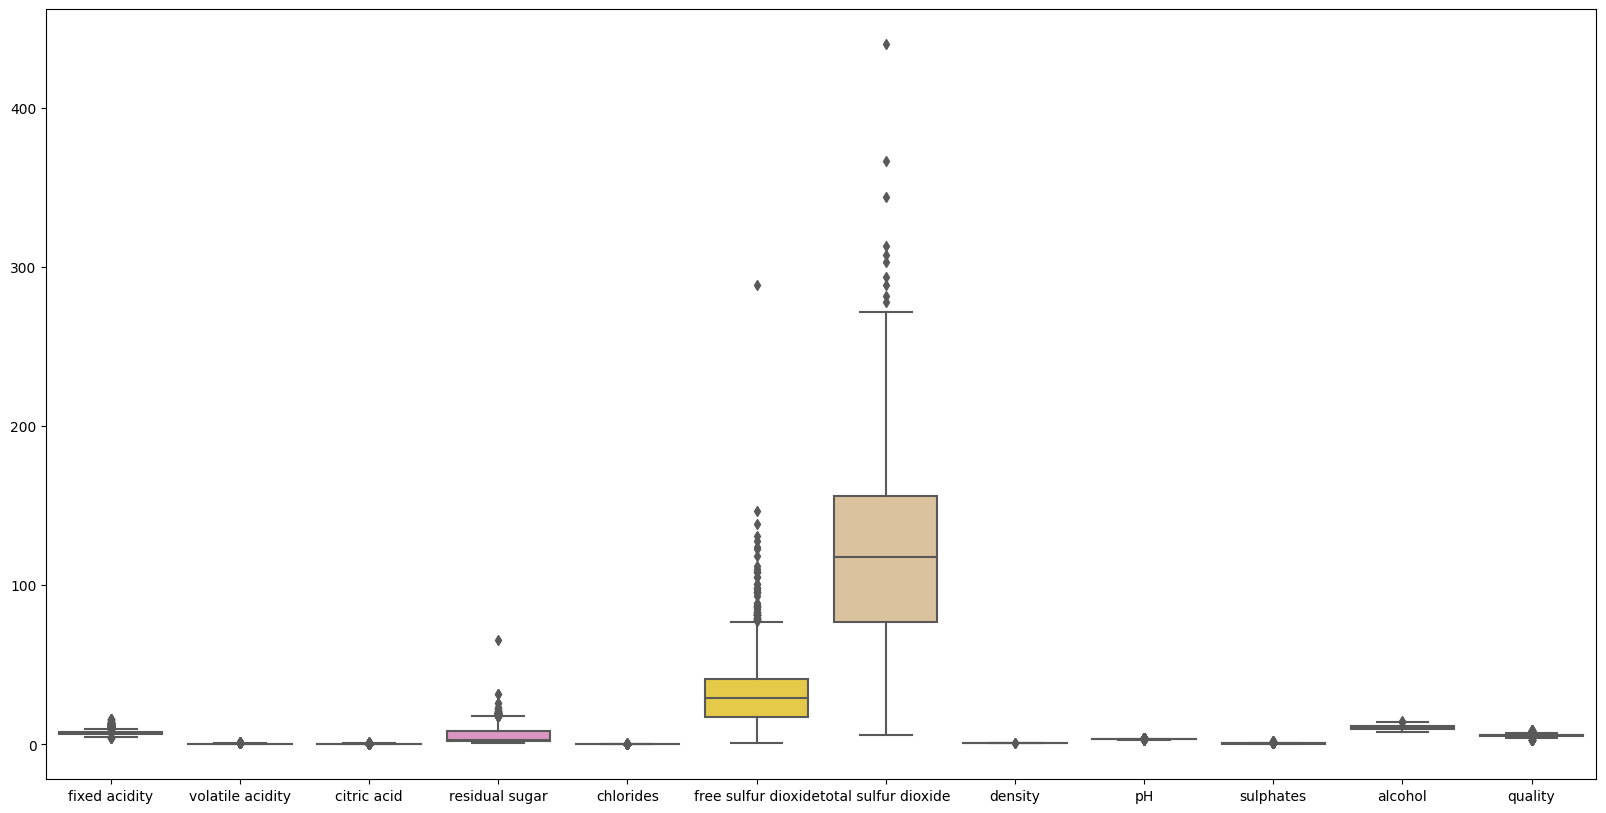

In [22]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df, palette = "Set2")
plt.show()

Выбросы можно обработать

In [23]:
Q1 = df["free sulfur dioxide"].quantile(0.25)
print(Q1)

17.0


In [24]:
Q3 = df["free sulfur dioxide"].quantile(0.75)
print(Q3)

41.0


In [25]:
IQR = Q3 - Q1
print(IQR)

24.0


In [26]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-19.0 77.0


In [27]:
df["free sulfur dioxide"].shape

(6497,)

In [28]:
df2 = df[(df["free sulfur dioxide"] > lower_limit) & (df["free sulfur dioxide"] < upper_limit)]

In [29]:
df2["free sulfur dioxide"].shape

(6430,)

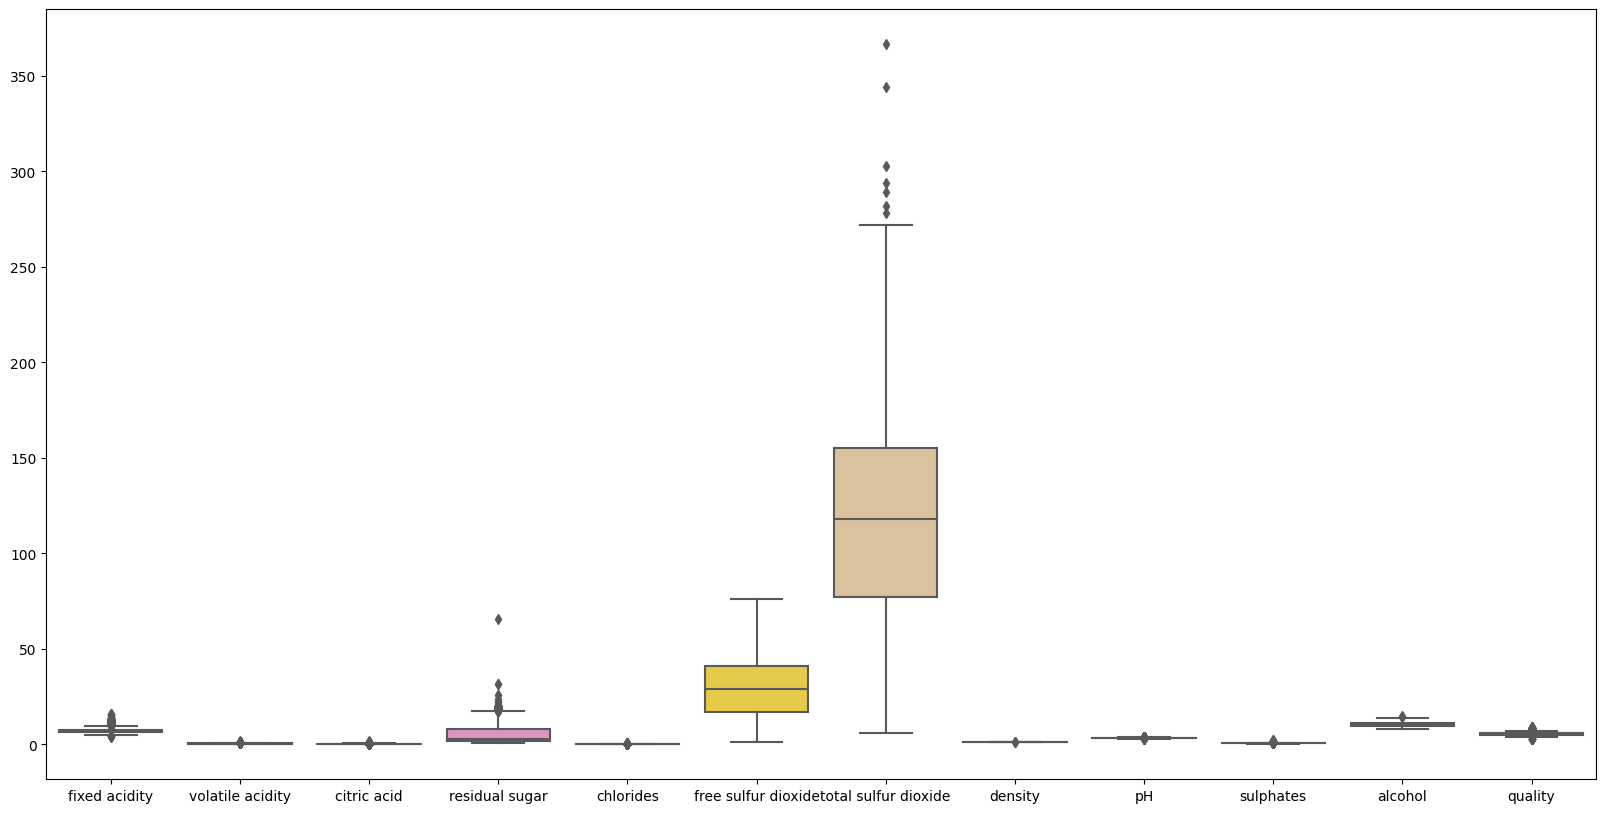

In [30]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df2, palette = "Set2")
plt.show()

In [31]:
Q1 = df2["total sulfur dioxide"].quantile(0.25)
print(Q1)

77.0


In [32]:
Q3 = df2["total sulfur dioxide"].quantile(0.75)
print(Q3)

155.0


In [33]:
IQR = Q3 - Q1
print(IQR)

78.0


In [34]:
lower_limit = Q1 - 1.5 *(IQR)
upper_limit = Q3 + 1.5 *(IQR)
print(lower_limit, upper_limit)

-40.0 272.0


In [35]:
df2["total sulfur dioxide"].shape

(6430,)

In [36]:
df3 = df2[(df2['total sulfur dioxide'] > lower_limit) & (df2['total sulfur dioxide'] < upper_limit)]

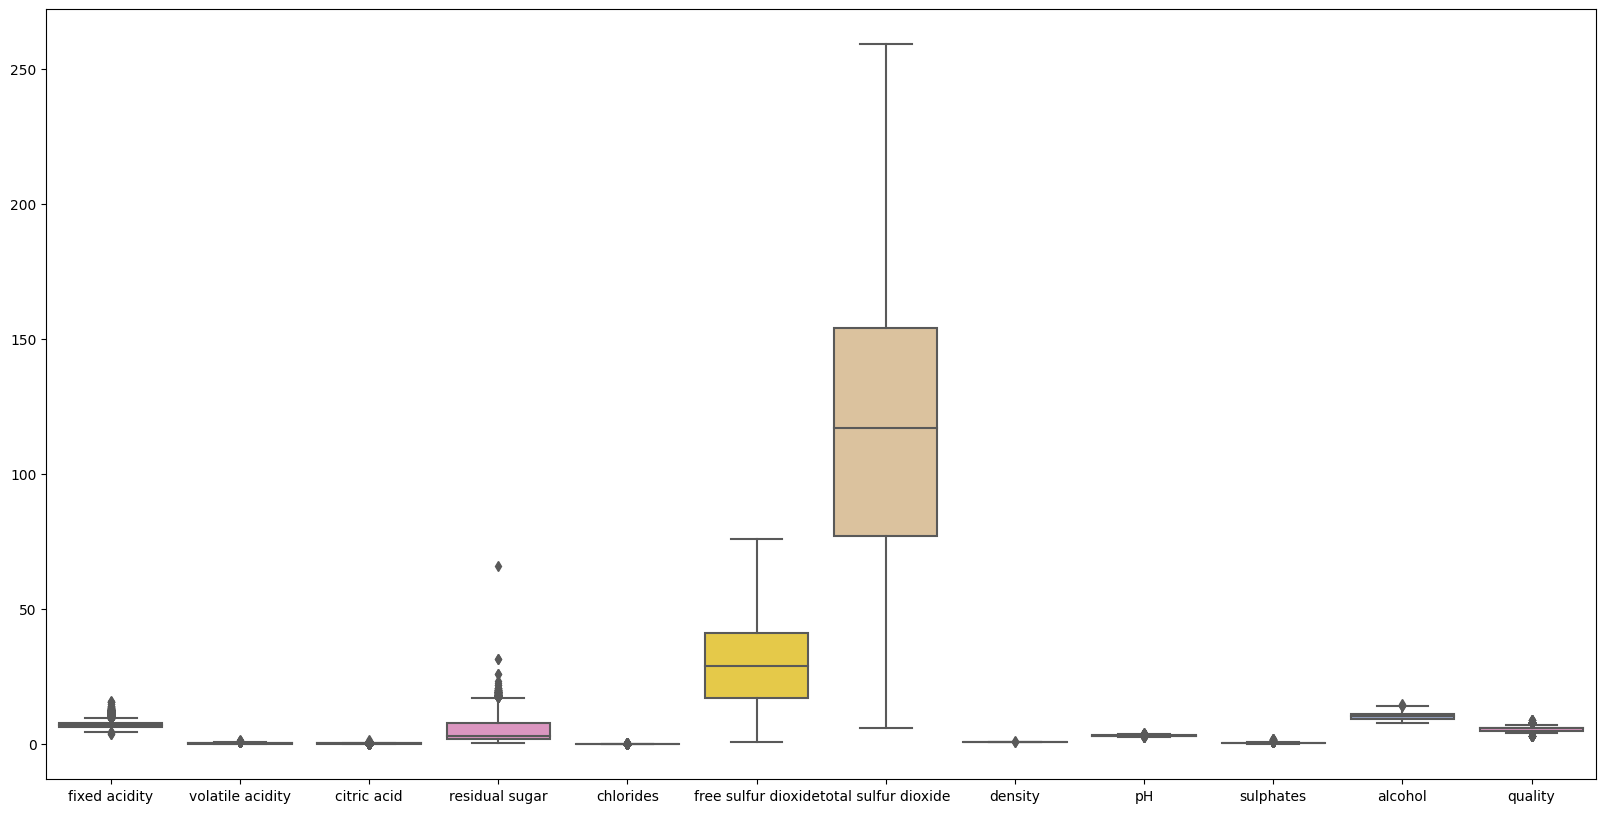

In [37]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df3, palette = "Set2")
plt.show()

Преобразование категориальных переменных

In [38]:
dummies = pd.get_dummies(df3["type"], drop_first = True)

In [39]:
df4 = pd.concat([df3, dummies], axis = 1)

In [40]:
df4.drop("type",axis=1,inplace=True)

In [41]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


Преобразование качества на три категории. Низкое - 0, среднее - 1, высокое - 2. 

In [42]:
df4.quality.value_counts()

6    2807
5    2112
7    1071
4     214
8     188
3      25
9       5
Name: quality, dtype: int64

In [43]:
quality_map = {3 : "Low",4 : "Low", 5 : "Medium", 6 : "Medium", 7 : "Medium", 8 : "High", 9 : "High"}
df4["quality"] = df4["quality"].map(quality_map)

In [44]:
df4.quality.value_counts()

Medium    5990
Low        239
High       193
Name: quality, dtype: int64

In [45]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Medium,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Medium,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Medium,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Medium,1


In [46]:
map_quality = {"Low" : 0, "Medium" : 1, "High" : 2}
df4["quality"] = df4["quality"].map(map_quality)

In [47]:
df4.quality.value_counts()

1    5990
0     239
2     193
Name: quality, dtype: int64

In [48]:
df4.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,1


Деление данных

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = df4.drop("quality", axis = True)
y = df4["quality"]

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# **Готовность к Modeling**

Эффективно ли очищены данные.
Правильно ли соединены разные наборы даных.
Задокументированы ли предыдущие шаги?

# **Моделирование**

выбрать модель, 
построить модель,
оценить модель 

Первая модель

In [53]:
from sklearn.svm import SVC

In [54]:
clf_svm1 = SVC(kernel="rbf",C=1)
clf_svm1.fit(X_train,y_train)

SVC(C=1)

In [55]:
y_pred = clf_svm1.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9299610894941635


In [63]:
accuracy_dataframe = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
accuracy_dataframe

,y_test,y_pred
328,1,1
1359,1,1
6102,1,1
2105,1,1
385,1,1
...,...,...
1518,1,1
1050,1,1
931,1,1
1643,1,1


Вторая модель

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
from sklearn.linear_model import LogisticRegression
clf_logi = LogisticRegression(C = 1)
clf_logi.fit(X_train, y_train)

LogisticRegression(C=1)

In [60]:
y_pred2 = clf_logi.predict(X_test)

In [61]:
accuracy2 = accuracy_score(y_test,y_pred2)
print(accuracy2)

0.930739299610895


In [64]:
accuracy_dataframe2 = pd.DataFrame({"y_test": y_test, "y_pred": y_pred2})
accuracy_dataframe2

,y_test,y_pred
328,1,1
1359,1,1
6102,1,1
2105,1,1
385,1,1
...,...,...
1518,1,1
1050,1,1
931,1,1
1643,1,1


# **Готовность к Evaluation**

Модель дала понятные результаты

Исследовано более 1 типа модели и сравнены результаты

Можно представить заказчику

# **Evaluation**

Ответить на вопросы:

Как представлены результаты?

Есть ли инсайты?

Применимы ли результаты к бизнесу?

Появились ли дополнительные вопросы в процессе моделирования?

Что пошло не так, как исправить?

Есть ли альтернативные решения?

Определить следующие шаги

# **Deployement**

Планирование внедрения для каждой модели

Планирование мониторинга и тех обслуживания. 

Что требует поддержки, как понять, что модель перестала быть актуальной.

Проведение итогового обзора проекта.